<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Monte-Carlo" data-toc-modified-id="Monte-Carlo-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Monte Carlo</a></span><ul class="toc-item"><li><span><a href="#Method" data-toc-modified-id="Method-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Method</a></span></li><li><span><a href="#Simulation" data-toc-modified-id="Simulation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Simulation</a></span></li></ul></li><li><span><a href="#Markov-Chains" data-toc-modified-id="Markov-Chains-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Markov Chains</a></span></li></ul></div>

# PyMC3

Monte Carlo Markov Chain Bayesian modeling...very confusing. To understand what it is about the union needs to be peeled layer by layer.

## Monte Carlo
### Method

Monte Carlo methods (or Monte Carlo experiments) are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results. Their essential idea is using randomness to solve problems that might be deterministic in principle. They are often used in physical and mathematical problems and are most useful when it is difficult or impossible to use other approaches. Monte Carlo methods are mainly used in three problem classes:
1. Optimization
2. Numerical integration
3. Generating draws from a probability distribution.


https://en.wikipedia.org/wiki/Monte_Carlo_method 

An example would be to calculate the surface of a 'difficult' shape.

### Simulation

The Mote Carlo simulation is a simulation technique where a (physical) process is simulated not just once but many times, each time with different starting conditions. The result of this collection of simulations is a probability function that reflects the full scope of possible outcomes.


The term Monte-Carlo comes from the famous Monte Carlo casino. This is not to say this method is based on gambling but rather refers to the way in which for each new simulation the starting conditions are determined assuming a collection of starting conditions that are realistic to expect.


Monte-Carlo simulations are used in a variety of scientific fields, like NASA (aka 'rocket science') projects where uncertainties play a major role. Also in the field of economics these simulations are frequently applied.

De Monte-Carlo simulation is appropriate in situations where:

- The result of a single simulation would not be sufficiently representative due to the expected variation in (or uncertainty of) starting conditions
- The possible variation or uncertainty of the starting conditions is known or may be reliably estimated



translate from: https://nl.wikipedia.org/wiki/Monte-Carlosimulatie 

## Markov Chains

A discrete-time Markov chain is a sequence of random variables X1, X2, X3, … that satisfy the Markov property — the probability of moving from the current state to the next state depends solely on the present state. In other words: completely independent.

A simple example would be weather, weather transitions and the associated probability in time:

<img src="https://github.com/MaartenKool/CookBooks-Sources/blob/master/MarkChainGraph.png?raw=true" width="600" height="300" align="MIDDLE"/>

Here the weather can have 3 states: Sunny, Rainy and Snowy. At each time interval there is a probability, chance, associated with the transition to the next state in time . I.e. 0.8 it will remain sunny, 0.01 it will snow and 0.19 it will rain. This may also be presented in a so-called transition matrix.

<img src="https://github.com/MaartenKool/CookBooks-Sources/blob/master/MarkChainTransMatr.png?raw=true" width="400" height="200" align="MIDDLE"/>

The transition matrix is the standard way of representing Markov chains 

All kinds of nice stats can be derived from a table like this.

Markov chains are important mathematical tools that effectively aid the simplification of predicting stochastic processes by viewing the future as independent of the past, given the present state of the process. 

This is all nice and dandy with discrete variables. That is: the number of combinations finite; in the example 9 possible transitions are possible. But what if one, or all, variables are continuous? Then the number of combinations are *in*finite.

This is where Monte Carlo comes in. Randomness can be used to approximate values that are otherwise difficult to calculate.



https://medium.com/@__amol__/markov-chains-with-python-1109663f3678 

In [15]:
import numpy as np
 
class MarkovChain(object):
    def __init__(self, transition_matrix, states):
        """
        Initialize the MarkovChain instance.
 
        Parameters
        ----------
        transition_matrix: 2-D array
            A 2-D array representing the probabilities of change of 
            state in the Markov Chain.
 
        states: 1-D array 
            An array representing the states of the Markov Chain. It
            needs to be in the same order as transition_matrix.
        """
        self.transition_matrix = np.atleast_2d(transition_matrix)
        self.states = states
        self.index_dict = {self.states[index]: index for index in 
                           range(len(self.states))}
        self.state_dict = {index: self.states[index] for index in
                           range(len(self.states))}
 
    def next_state(self, current_state):
        """
        Returns the state of the random variable at the next time 
        instance.
 
        Parameters
        ----------
        current_state: str
            The current state of the system.
        """
        return np.random.choice(
         self.states, 
         p=self.transition_matrix[self.index_dict[current_state], :]
        )
 
    def generate_states(self, current_state, no=10):
        """
        Generates the next states of the system.
 
        Parameters
        ----------
        current_state: str
            The state of the current random variable.
 
        no: int
            The number of future states to generate.
        """
        future_states = []
        for i in range(no):
            next_state = self.next_state(current_state)
            future_states.append(next_state)
            current_state = next_state
        return future_states

In [20]:
transition_matrix = [[0.8, 0.19, 0.01],
                         [0.2,  0.7,  0.1],
                         [0.1,  0.2,  0.7]]
weather_chain = MarkovChain(transition_matrix=transition_matrix,
                                states=['Sunny', 'Rainy', 'Snowy'])
weather_chain.next_state(current_state='Sunny')
# 'Sunny'
# >>> weather_chain.next_state(current_state='Snowy')
# 'Sunny'
# >>> weather_chain.generate_states(current_state='Snowy', no=10)
# ['Snowy', 'Rainy', 'Rainy', 'Rainy', 'Rainy', 'Rainy', 
#  'Rainy', 'Rainy', 'Sunny', 'Sunny']

'Sunny'

In [22]:
weather_chain.next_state(current_state='Snowy')

'Snowy'

In [23]:
weather_chain.generate_states(current_state='Snowy', no=10)

['Snowy',
 'Rainy',
 'Sunny',
 'Sunny',
 'Rainy',
 'Rainy',
 'Snowy',
 'Rainy',
 'Rainy',
 'Sunny']

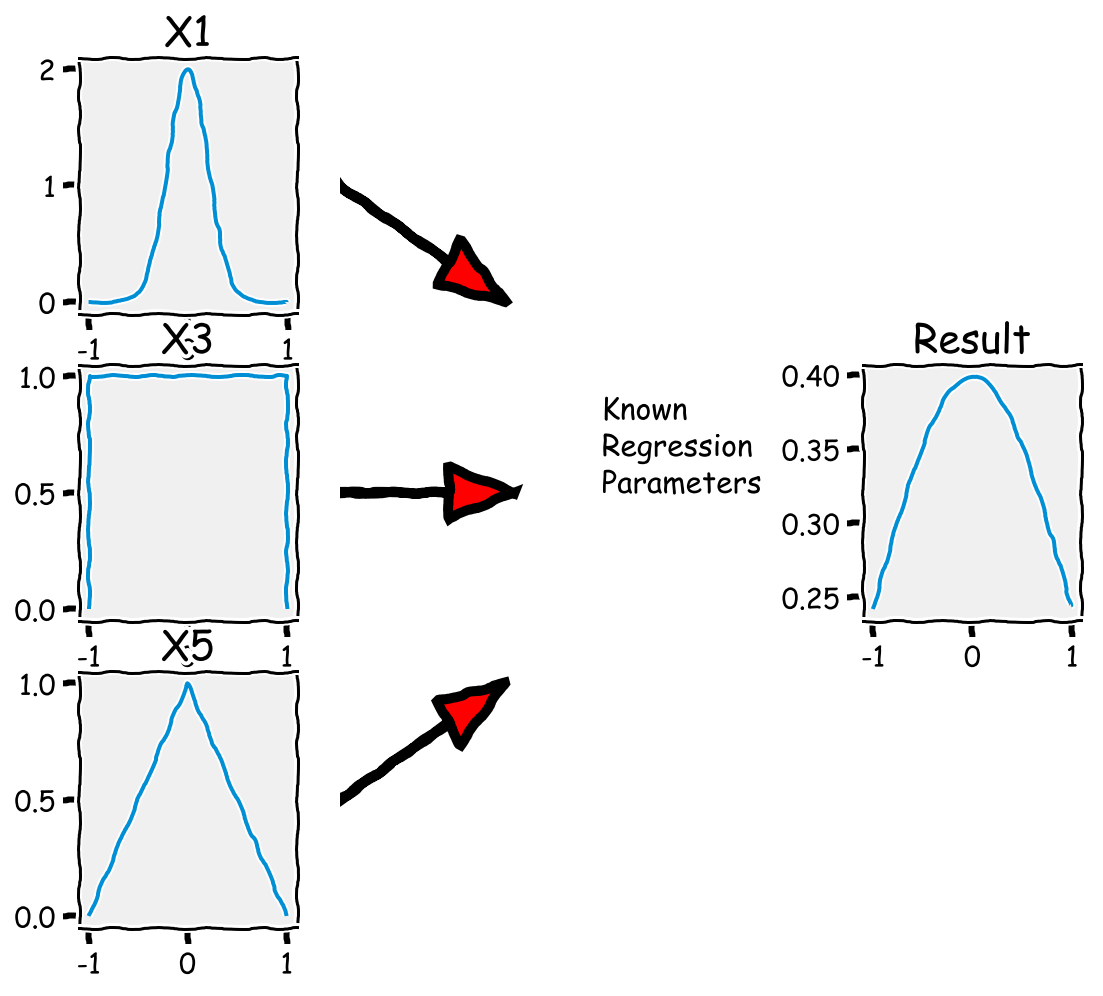

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

import pylab as plt




with plt.xkcd(randomness=10):
    fig=plt.figure(figsize=(8,8) )
    plt.title('title')
#     fig.set_title('Monte Carlo Simulation Depiction')
    ax1 = plt.subplot2grid((3,4),(0, 0))
    ax2 = plt.subplot2grid((3,4),(0, 1))
    ax3 = plt.subplot2grid((3,4),(1, 0))
    ax4 = plt.subplot2grid((3,4),(1, 1))
    ax5 = plt.subplot2grid((3,4),(2, 0))
    ax6 = plt.subplot2grid((3,4),(2, 1))
    ax7 = plt.subplot2grid((3,4),(1, 2))
    ax8 = plt.subplot2grid((3,4),(1, 3))
    ax2.axis('off')
#     fig, ax = plt.subplots(3, 1, figsize=(6,12))
    # Plot between -10 and 10 with .001 steps.
    x_axis = np.arange(-1, 1, 0.01)
    # Mean = 0, SD = .2
    ax1.plot(x_axis, norm.pdf(x_axis,0,.2))
    ax1.set_title('X1')

    xpoints=[-1,-1,1,1]
    ypoints=[0,1,1,0]
    # Mean = 0, SD = 2.
    # for p in points:
    ax3.plot(xpoints,ypoints)
    ax3.set_title('X3')

    xpoints=[-1,0,1]
    ypoints=[0,1,0]
    # Mean = 0, SD = 2.
    # for p in points:
    ax5.plot(xpoints,ypoints)
    ax5.set_title('X5')
    
    ax4.arrow(0, 0.5, 0.5, 0 , lw=5, head_width=.2, head_length=.3, fc='r', ec='k')
    ax4.axis('off')
    ax2.arrow(0, 0.5, 0.5, -0.3 , lw=5, head_width=.2, head_length=.3, fc='r', ec='k')
    ax2.axis('off')
    ax6.arrow(0, 0.5, 0.5, 0.3 , lw=5, head_width=.2, head_length=.3, fc='r', ec='k')
    ax6.axis('off')
#     ax7.rc('text', usetex=True)
#     ax7.text(0, 0.5, r'$ y = \beta_0+\beta_1 x+ \beta_2 x_2+\ldots+\beta_p x_p+\epsilon $', fontsize=15)
    ax7.text(0, 0.5, 'Known\nRegression\nParameters', fontsize=15)

    ax7.axis('off')
    x_axis = np.arange(-1, 1, 0.01)
    # Mean = 0, SD = .2
    ax8.plot(x_axis, norm.pdf(x_axis,0,1))
    ax8.set_title('Result')
    plt.show()
    


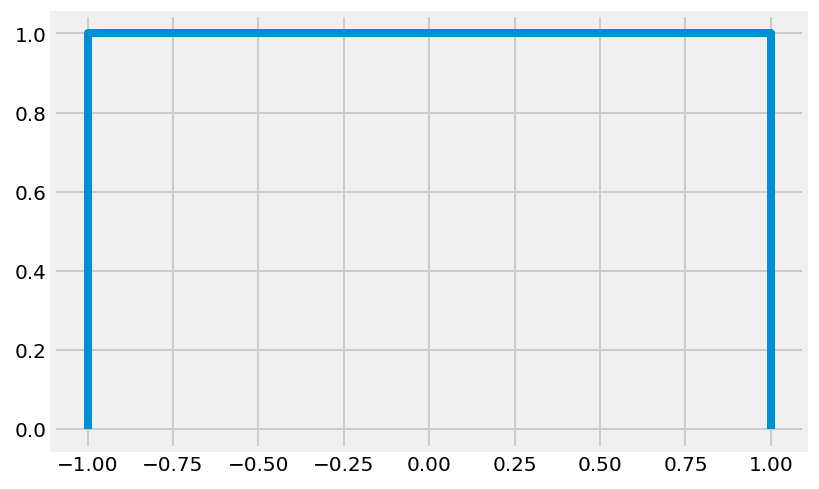

In [16]:
# Plot between -10 and 10 with .001 steps.
# x_axis = np.arange(-1, 1, 0.01)
xpoints=[-1,-1,1,1]
ypoints=[0,1,1,0]
# Mean = 0, SD = 2.
# for p in points:
plt.plot(xpoints,ypoints)
plt.show()

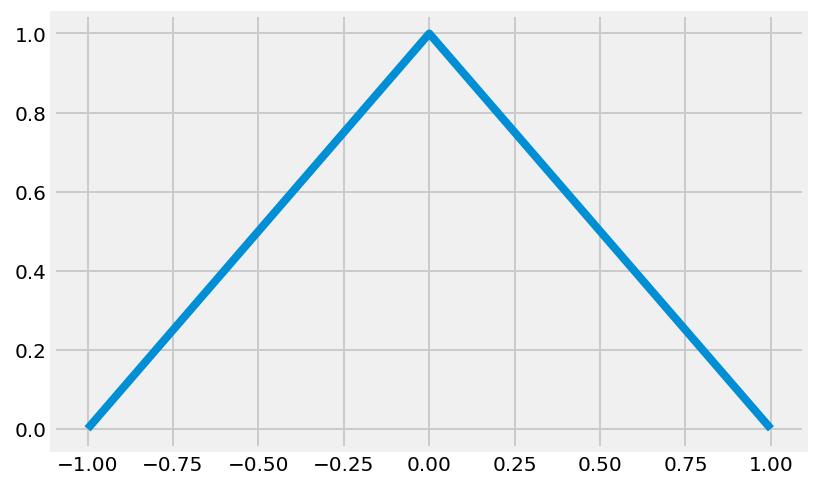

In [17]:
# Plot between -10 and 10 with .001 steps.
# x_axis = np.arange(-1, 1, 0.01)
xpoints=[-1,0,1]
ypoints=[0,1,0]
# Mean = 0, SD = 2.
# for p in points:
plt.plot(xpoints,ypoints)
plt.show()

In [71]:
ax1 = plt.subplot2grid((3,3),(0, 0))

ValueError: too many values to unpack (expected 2)

<Figure size 432x288 with 0 Axes>

In [95]:

y = '$$\beta_0+\beta_1 x+ \beta_2 x_2+\ldots+\beta_p x_p+\epsilon $$'

print(y)

 $$eta_0+eta_1 x+ eta_2 x_2+\ldots+eta_p x_p+\epsilon $$


In [97]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


plt.title(r"$$ y = \beta_0+\beta_1 x+ \beta_2 x_2+\ldots+\beta_p x_p+\epsilon $$",fontsize=16, color='gray')

Text(0.5, 1.0, '$$ y = \\beta_0+\\beta_1 x+ \\beta_2 x_2+\\ldots+\\beta_p x_p+\\epsilon $$')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x11a833d08> (for post_execute):


FileNotFoundError: [Errno 2] No such file or directory: 'latex': 'latex'

FileNotFoundError: [Errno 2] No such file or directory: 'latex': 'latex'

<Figure size 432x288 with 1 Axes>